In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from environments.base import DummyEnvironment
from environments.contextual import OrderBookEnvironment
from learners.experts import GFTMax, ConstrainedGFTMax
from utils.regret import compute_scaling_laws
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [13]:
T = 100000000 # Best expert over 100 Million turns is computed in less than 1 minute
env = DummyEnvironment(T)
print(env.get_best_expert())

((0.0, 0.25), 12499386.0)


In [3]:
T = 100000
env = DummyEnvironment(T)
learner = GFTMax(T, env)
learner.run()

Best expert on multiplicative grid: [0.25 0.25]. GFT: 75000.0


In [3]:
T = 100000
env = OrderBookEnvironment(T)
learner = ConstrainedGFTMax(T, env)
learner.run()

Best expert on multiplicative grid: [0.39240506 0.39240506]. GFT: 60937.5


In [8]:
time, regret = compute_scaling_laws(GFTMax, DummyEnvironment)

Best expert on multiplicative grid: [0. 0.]. GFT: 2511.0
Best expert on multiplicative grid: [0.75 0.75]. GFT: 5018.0
Best expert on multiplicative grid: [0. 0.]. GFT: 7503.0
Best expert on multiplicative grid: [0.75177305 0.75177305]. GFT: 10003.0
Best expert on multiplicative grid: [0. 0.]. GFT: 12509.75
Best expert on multiplicative grid: [0.75144509 0.75144509]. GFT: 15012.5
Best expert on multiplicative grid: [0. 0.]. GFT: 17548.25
Best expert on multiplicative grid: [0.75 0.75]. GFT: 20066.75
Best expert on multiplicative grid: [0. 0.]. GFT: 22524.25
Best expert on multiplicative grid: [0. 0.]. GFT: 25024.5
Best expert on multiplicative grid: [0.75053305 0.75053305]. GFT: 27558.5
Best expert on multiplicative grid: [0.75051125 0.75051125]. GFT: 30060.5
Best expert on multiplicative grid: [0.75049116 0.75049116]. GFT: 32511.25
Best expert on multiplicative grid: [0. 0.]. GFT: 35112.0
Best expert on multiplicative grid: [0. 0.]. GFT: 37542.0
Best expert on multiplicative grid: [0.7

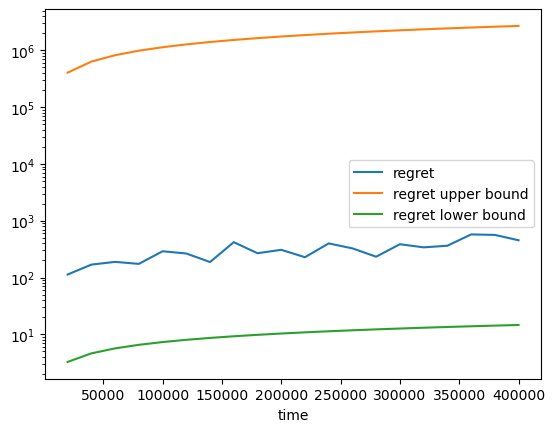

In [9]:
# Plot regret against time
df = pd.DataFrame({'time': time, 'regret': regret})
df.plot(x='time', y='regret')
# add the following equation for the upper bound: 92log^(3/2)(T)sqrt(T)
plt.plot(time, 92*np.log(time)**(3/2)*np.sqrt(time), label='regret upper bound')
# add the following equation for the lower bound: 5/216 sqrt(T)
plt.plot(time, 5/216*np.sqrt(time), label='regret lower bound')
plt.yscale('log')
plt.legend()
plt.show()

In [4]:
time, regret = compute_scaling_laws(ConstrainedGFTMax, OrderBookEnvironment, policy_regret=True)

Best expert on multiplicative grid: [0.04964539 0.04964539]. GFT: 2593.5
Best expert on multiplicative grid: [0.8 0.8]. GFT: 5619.25
Best expert on multiplicative grid: [0.04918033 0.04918033]. GFT: 8599.296875
Best expert on multiplicative grid: [0.04964539 0.04964539]. GFT: 11303.296875
Best expert on multiplicative grid: [0.79746835 0.79746835]. GFT: 14516.9375
Best expert on multiplicative grid: [0.04913295 0.04913295]. GFT: 17187.828125
Best expert on multiplicative grid: [0.04812834 0.04812834]. GFT: 20195.90625
Best expert on multiplicative grid: [0.7975 0.7975]. GFT: 23360.390625
Best expert on multiplicative grid: [0.04716981 0.04716981]. GFT: 26161.484375
Best expert on multiplicative grid: [0.04697987 0.04697987]. GFT: 29473.84375
Best expert on multiplicative grid: [0.04690832 0.04690832]. GFT: 32342.578125
Best expert on multiplicative grid: [0.79754601 0.79754601]. GFT: 35352.484375
Best expert on multiplicative grid: [0.79764244 0.79764244]. GFT: 37940.5
Best expert on m

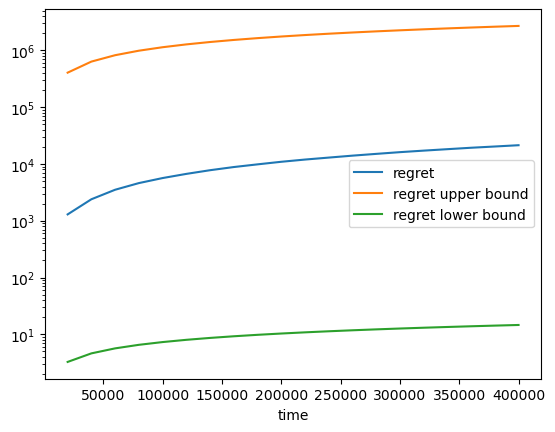

In [5]:
# Plot regret against time
df = pd.DataFrame({'time': time, 'regret': regret})
df.plot(x='time', y='regret')
# add the following equation for the upper bound: 92log^(3/2)(T)sqrt(T)
plt.plot(time, 92*np.log(time)**(3/2)*np.sqrt(time), label='regret upper bound')
# add the following equation for the lower bound: 5/216 sqrt(T)
plt.plot(time, 5/216*np.sqrt(time), label='regret lower bound')
plt.yscale('log')
plt.legend()
plt.show()